<a href="https://colab.research.google.com/github/majorquev/DBDC_202406_Programacion_en_R_para_ciencia_de_datos/blob/main/Clases/C7/Clase7_2_Distribuciones_de_probabilidad_en_r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parte 6: Distribuciones de probabilidad

**Autor:** Miguel Jorquera Viguera.<br>
**E-mail:** majorquev@gmail.com<br>
**Ayudante:** Rodrigo Morales<br>
**E-mail ayudante:** rumorale1@gmail.com

En R podemos obtener valores tanto de las funciones de densidad, distribución de probabilidad, cuantiles de una distribución o bien generar valores aleatorios de diversas distribuciones paramétricas.
Casi todas las distribuciones que se encuentran implementadas en la librería base de R se referencian de la misma manera.

* Funciones de densidad (PDFs) comienzan con la letra “d.”
* Funciones de distribución acumulada comienzan con la letra “p.”
* Funcioenes que retornan quantiles de una distribución comienzan con la letra “q.”
* Funciones que generan valores aleatorios comienzan con la letra“r.”

Por defecto, en R contamos con una amplia variedad familias de distribuciones enre las que destacan las siguientes.



**Distribution**| **R name**| **additional arguments**
-----| -----| -----
beta |`beta` |shape1, shape2, ncp
binomial| `binom`| size, prob
Cauchy|`cauchy` |location, scale
chi-squared| `chisq`| df, ncp
exponential| `exp` |rate
F| `f` |df1, df2, ncp
gamma |`gamma` |shape, scale
geometric |`geom` |prob
hypergeometric| `hyper`| m, n, k
log-normal| `lnorm` |meanlog, sdlog
logistic |`logis` |location, scale
negative| `binomial`| nbinom size, prob
normal |`norm` |mean, sd
Poisson| `pois`| lambda
signed rank |`signrank`| n
Student’s t| `t`| df, ncp
uniform |`unif`| min, max
Weibull| `weibull`| shape, scale
Wilcoxon |`wilcox`|m, n




# I) Distribución normal

## Función de densidad
$$f(x) = \frac{1}{\sqrt{2 π \sigma^2}} e^{-\frac{1}{2\sigma^2}(x - \mu)^2}$$

## En R...

* `dnorm(x, mean = 0, sd = 1, log = FALSE)`: Evalúa la función de densidad.
* `pnorm(q, mean = 0, sd = 1, lower.tail = TRUE, log.p = FALSE)`: Calcula la probabilidad acumulada (función de distribución).
* `qnorm(p, mean = 0, sd = 1, lower.tail = TRUE, log.p = FALSE)`: Calcula los quantiles de la distribución. (Función inversa de la función de distribución de probabilidad).
* `rnorm(n, mean = 0, sd = 1)`: Genera muestras aleatroias.




**P1.** Se sabe que la estatura de la población adulta de sexo masculino chilena sigue una distribución normal con media 171,8 cms y una desviación estándar de 5cms

**a)** ¿Cuál es la probabilidad de encontrar de que una persona hombre  adulta tenga una estatura
menor o igual a 160 cms?

In [1]:
# pnorm()
# Si X distribuye normal con mu = 171.8 y sd = 5
# P(X <= 160)
pnorm(160, mean = 171.8, sd = 5 )
# La prob de que una persona de gènero masculino Chilena tenga una estatura menor o igual a 160 es de 0.9%.
# Se espera que de cada 100 personas (de género masculino...) approx. 1 de ellas mida 160 cms o menos.


[1] 0.009137468

  
**b)** ¿Cuál es la probabilidad de encontrar de que una persona adulta tenga una estatura mayor  a 160 cms?
  

In [3]:
#P(estatura > 160) = 1- P(estatura <= 160)

1-pnorm(160, mean = 171.8, sd = 5 ) # Hay un 99% de probabilidad de encontrar.....
pnorm(160, mean = 171.8, sd = 5 , lower.tail = F)

[1] 0.9908625

[1] 0.9908625

**c)** ¿Cuál es la probabilidad de encontrar una persona con estatura entre 180cms y 190 cms?

In [4]:
pnorm(190, mean = 171.8, sd = 5 ) - pnorm(180, mean = 171.8, sd = 5 )
# Hay un 5% de probabilidad de ....
# Se espera que de cada 100 hombbres Chilenos adultos, 5 de ellos tengan estatura entre 180 y 190.

[1] 0.05036626

**d)** ¿Cuál es la estatura que corresponde al percentil 90?

In [6]:
# Cual es la estatura que acumula el 90 % de probabilidad
qnorm(0.9, mean = 171.8, sd = 5)
# El 90% de la población (personas....) se espera qe tenga una estatura menor o igual a 178.2 cms
qnorm(0.1, mean = 171.8, sd = 5, lower.tail = F)#  Si acumulamos las probs. desde la derecha.

[1] 178.2078

[1] 178.2078

**d)**  Genere una muestra aleatoria de tamaño 1000 y guárdela en un vector llamado _estaturas_, provenientes de una distribución normal con media 171,8 y desviación estandar igual a 5.

In [13]:
# estaturas
set.seed(2020) #semilla
estaturas <- rnorm(n=1000, mean = 171.8, sd = 5)


In [15]:
head(estaturas,100)

[1] 173.6849 173.3077 166.3099 166.1480 157.8173 175.4029 176.4956 170.6531
  [9] 180.5957 172.3868 167.5344 176.3463 177.7819 169.9421 171.1837 180.8002
 [17] 180.3200 156.6062 160.3551 172.0915 182.6718 177.2909 173.3911 171.4343
 [25] 175.9713 172.7938 178.2892 176.4836 171.0628 172.3522 167.7375 168.0815
 [33] 177.2767 183.9769 173.7406 173.2531 170.3720 172.1801 168.9985 174.0359
 [41] 176.3425 169.2747 170.2950 168.1698 165.8996 173.0654 169.9464 171.9109
 [49] 175.1002 174.2440 170.8561 174.8068 168.4312 174.1803 172.3938 172.4061
 [57] 170.8698 165.1586 168.9654 174.6942 181.3452 173.0538 163.8084 187.8082
 [65] 176.5762 173.6432 176.4146 170.7724 172.2648 172.6413 175.7792 180.0300
 [73] 163.2154 170.2083 167.2793 168.2800 162.9095 168.1887 172.0308 173.0183
 [81] 174.9417 171.6768 183.3708 172.6861 166.6779 183.1734 162.3547 177.2698
 [89] 181.0308 174.4052 164.1352 162.1032 174.2346 178.0262 170.7136 167.9020
 [97] 173.5444 175.2086 169.1427 168.4130

In [16]:
summary(estaturas)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  156.0   168.2   171.5   171.7   175.0   190.3 

In [17]:
mean(estaturas)
sd(estaturas)

[1] 171.6666

[1] 5.184827

**e)** Mediante la función _hist()_ y la función _curve()_  genere un histograma de la muestra creada y añada la curva de distribución normal con la media y desviación estandar reales.

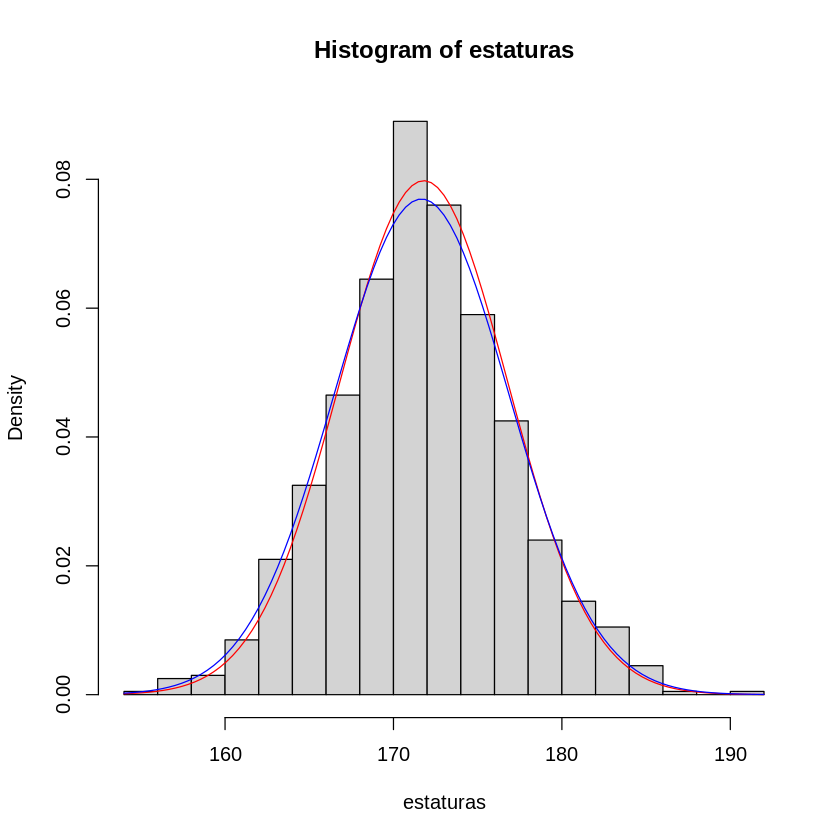

In [21]:
## NOTA
hist(estaturas, freq = F, breaks = 20)
curve(dnorm(x, mean = 171.8, sd = 5), add = T, col = "red")# Densidad con parámetros reales
curve(dnorm(x, mean = mean(estaturas), sd = sd(estaturas)), add = T, col = "blue") # Densidad con parámetros estimados

In [25]:
library(ggplot2)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [24]:
# Notar que en un histograma podemos visualizar los conteos o las frecuencias relativas.
df <- data.frame(est = estaturas)
head(df)


,est
,<dbl>
1,173.6849
2,173.3077
3,166.3099
4,166.1480
5,157.8173
6,175.4029


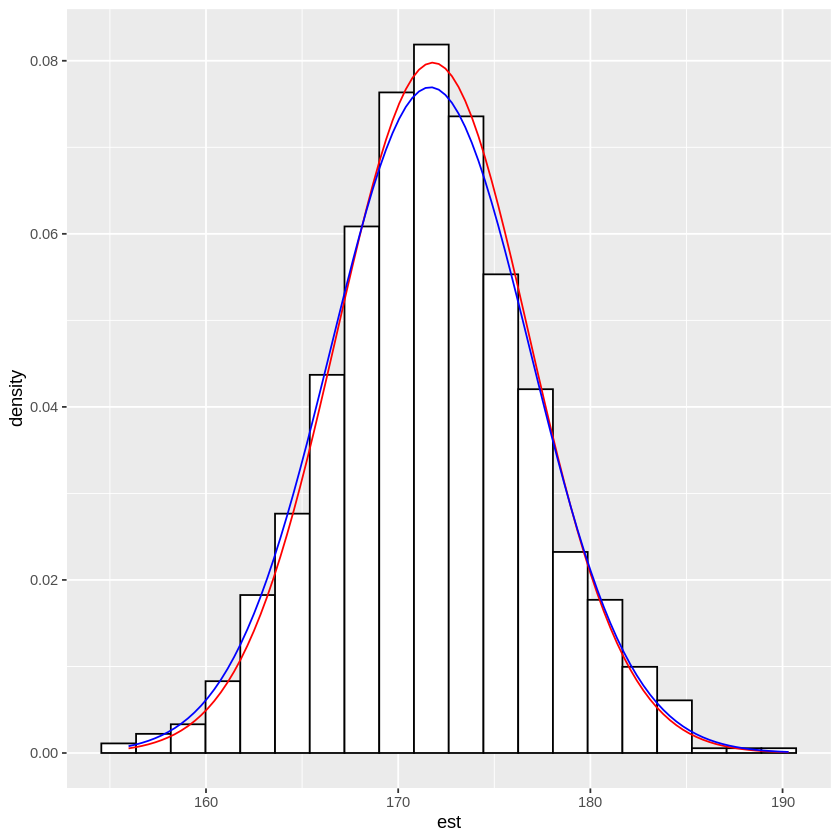

In [33]:
df %>%
  ggplot() +
  aes(x = est) +
  geom_histogram(
    bins = 20,
    fill = "white",
    color = "black",
    mapping = aes(y = after_stat(density))
  ) +
  stat_function(# densidad con parámetros reales (la roja del caso anterior)
    fun = dnorm,
    args = list(mean = 171.8, sd = 5),
    col = "red"
  ) +
  stat_function(# densidad con parámetros estimados (la azul del caso anterior)
    fun = dnorm,
    args = list(mean = mean(df$est), sd = sd(df$est)),
    col = "blue"
  )

# II)Distribucion binomial
## Contexto
Cuando una variable aleatoria representa la cantidad de éxitos en $n$ ensayos independientes de tipo Bernoulli (0 o 1), se dice que dicha variable sigue una distribución binomial.

## Función de probabilidad


$$p(x) = {n\choose x}p^x(1-p)^{n-x}$$
Donde $n$ es el total de ensayos realizados y $x$ es la cantidad de éxitos observados y $p$ es la probabilidad de éxito del evento de interés.

## En R...

* `dbinom(x, size, prob, log = FALSE)`: Evalúa la función de masa. En el caso discreto corresponde a la probabilidad del evento.
* `pbinom(q, size, prob, lower.tail = TRUE, log.p = FALSE)`: Calcula la probabilidad acumulada.
* `qbinom(p, size, prob, lower.tail = TRUE, log.p = FALSE)`: Retorna cuantiles de la distribución.
* `rbinom(n, size, prob)`: Genera muestras aleatorias.



In [36]:
# Experimento: Lanzar una moneda 5 veces y registrar el total caras
# X: "total de caras obtenidas" -> {0,1,2,3,4,5}
# ¿Prob de obtener exactamente 3 caras?
dbinom(3,size = 5, prob = 0.5)# 31% de prob de obtener exactamente 3 caras.

choose(5,3)*(0.5^3)*(1-0.5)^(5-3)


[1] 0.3125

[1] 0.3125

**P2.** Suponga que un spot publicitario de un artículo tiene una tasa de efectividad de 20% sobre una determinada población.

**a)** Suponga que se logra llegar con el spot a 100 personas. ¿Cuál es la probabilidad de que
 exactamente 30  personas compren el artículo ofrecido?

In [37]:
# Identifiquemos algunos elementos como
# Experimento : Hacer llegar el spot a las 100 personas y registrar el número de clientes que efectivamente compraron el artículo.
# Variable aleatoria : X: "el número de clientes (de los 100) que compraron el artículo"
# Espacio muestral : {0,1,2,...,100}
#-------parámetros de pbinom ---------
#size (n): 100
#prob (p): 0.2

# P(X = 30 | n = 100, p = 0.2)
dbinom(x = 30, size = 100, p = 0.2)# 0.5% de prob exactamente 30 compren.



[1] 0.005189643

**b)** Suponga que se logra llegar con el spot a 100 personas. ¿Cuál es la probabilidad de que
 al menos 30  personas compren el artículo ofrecido?

In [39]:
# P(X >= 30) = 1-P(X < 30)
1-pbinom(29, size = 100, prob = 0.2)#Hay un 1.1% de prob de que 30 o más compren
pbinom(29, size = 100, prob = 0.2, lower.tail = F)

[1] 0.01124898

[1] 0.01124898

In [42]:
sum(dbinom(30:100, size = 100, prob = 0.2)) # las cuentas cudran!

[1] 0.01124898

**P3.** En una localidad se sabe que el 70% de las casas tienen un televisor.  Se quiere realizar una encuesta a 8 casas ¿cuál es la probabilidad de que 6 o más de ellas tengan televisor?

In [43]:
# size = 8
# prob = 0.7
pbinom(5, size = 8, prob = 0.7, lower.tail = F) #55% de prob. de que 6 o más casas tengan TV.

[1] 0.5517738

## Lanzando una moneda
**P4** Supongamos que una **honesta** se lanza 14 veces y se anota el número veces que se obtuvo cara.

**a)** ¿Cuál es la probabilidad de obtener exactamente 4 caras? ¿y al menos 10?

In [ ]:
#size = n = 14, y prob = p = 0.5 ?



In [ ]:
# P(X >= 10)


  
**b)** Si se repite el experimento 5000 veces.


*   ¿Qué proporción de caras se debería esperar?¿y si se repite más veces?
*   ¿En qué % de casos se obtuvo exactamente 4 caras? ¿ y si se repite más veces?


 Utillice la función rbinom para simular el experimento 100 veces.

In [52]:
# simulamos un experimento binomial
set.seed(2024)
N <- 5000
lanzamientos <- rbinom(n = N, size = 14, prob = 0.5)




In [47]:
lanzamientos

[1]  9  6  8  8  7  8  7  6  9  5  9 10  8  7  7  9  5  9  5  6  4  5  8  9
  [25]  9  6  8  9  1  3  7  6  5 11  8  8  4 10  3  8  9 10  8  6  9  7  7  6
  [49]  8  8  4  8  7  7  8  8  3  5  7  6  4  7  6  8  6  9  9  8  6  6  8  5
  [73]  8  7  6  8  6  4  8  6  5  6  7  3  8  7 11  6  5  9  7  9  8  4  8  5
  [97]  8  7 11  7  6  8  6  7  6  9  5  4  6  9  4  8  9  4  7  9  9  5  7  6
 [121] 10  4  9  5  8  3  7  9 10 12  7  3  3  7  8  8  8  5  3  7  9  6  5  7
 [145]  8 12  7  6  7  6  6  7 10  5  8  7  5  3  7  5  5  8  9  5  9  9  4  8
 [169]  7  6  9  8  7  9  7  8  7  3  9  7  5 10  6  8  6 12  8  8  8  5  3  3
 [193]  5  4  5  4  7  7  9 10 11  4  8  5  9  4  7  7  5  9  8  9  7  7  9  7
 [217]  6  9  5  5  5  7  9  7  6  9  7 10  6  7  4  5 11  6  8 10  7  5  9 10
 [241]  7  4  6  7  5  5  7  9  6  9  7  5  5  7  5  7  6  6  8  2  5  4  7  8
 [265]  6  7  7  5 10 11  5  4  5  4  8  7  8  5  6 11  8  7  5  7  6  6 10 11
 [289]  9  4  8  9 10  8  7  6  9  8  9  5  5  8  7  8 11  5  9  7  6  9  2  6
 [313]  8  6  6  4  6 11  8  4 10  8  7 10  7  6 10 10  6  5  6 11  7  8  4  7
 [337]  9  9 11 10  6  7  9 10  6  7  7  6  8  7  9  7  9  8  7  6  8  9  6  8
 [361]  8  4  7  8  8  9  6  7  6  8  8 10  9  3  6  8  6  4  8  5  6  6  5  8
 [385]  8  7  9  8  9  6  8  5  9  5  8  9 11  9  4  8  7  9  8 11  6  4  7  7
 [409]  9  8  5  7  6  7  7  9  9  7  8  4  6 11  8  9  6 11  2  6  8 11  8  6
 [433]  8  8  8 10  6 10  9  7  6  7 10  6  7  9  7  7  7  5  7  8  7  6  8  7
 [457]  7  8  8  9 10  6  8  6  7  6  6  8  7  3  7  4  7  6  6  6  7  8  5  9
 [481]  7  8  9  6 10  5  9  7  5  7 10 10  6  9  7  9  5  9  7  9 10  7  7  6
 [505]  9  4  6  7  8  9  4  4  7  9  7  5  8  7  5 10  7  9  6 10  8  8  6  7
 [529]  2  6  8  9  6  8  8  4  8  6  9  7  9  7  7  8  5  8  5  5  8  8  7  7
 [553]  6  9  4  7  5  8  7  9  8  7  7  8 10  4  7  5  8  9  6  7  6  3  7  6
 [577]  9  5 12  9  6  3  9  6 10  8  6  7  8  8  8  2  9  9  5 10  5  8  7  8
 [601]  8  9  6  8  6  8  9  6 10  9  8  8  7  7  8 11  7  6  9  8  8  7  5  4
 [625]  4  9  5  8 12  7  6 10  7  6  7  9  9  7  6  6  5  5  7  7  8  5  6  8
 [649] 12  7  7  4  5  7  8  9  3  8  6  8  7  8  6  7  9  4  6  7  9  5  4  8
 [673] 10  7  3  6  7  7  8  9  6  8  4  7  8  7  7  6  8  4 10  6  5  7  8  5
 [697]  5 10  9  4  6  7  8  5  8  4  6  6  3  6  6  9  8  7  9  5  9  6  5  8
 [721]  7  6  8 11  6  5  6  8  8  8  6  5  7  9  7  4  8  7  6  5 10  5  6  7
 [745]  6  8  7  7  7  8  7  7  7  4  6  7 11  4  5  8  7  8  7  7  7 11  7  7
 [769] 10  7  8  4  4  3  9  7  7  7  9 10  7 10  8  5  9  6  5  8 10  5  8  7
 [793]  6  6  7  8  4  6  7  5 11  5  8  6  7  7  5  7  9  5  3  6  7  7  7  7
 [817]  8  7  8  6 10  7  7  6  9  6  8  5  8  5  7  7  5  6  5  6  4  7  8  7
 [841]  4  6 10  9  7  8  6  6  9  8  6  5 10  6  4  8  9  7 10  9 11  9 10  6
 [865]  9  8  5  7  9  7  9 10  4  6  5  8  6  6  7  8  6  9 10  7  7  7  6  8
 [889]  8  7  6  7  5  9  6  6  7  7  6  7  5  7  9  7  5  8  3  7  8  8  9  3
 [913]  8  6  8  7  5  4  9  3  8  9  8  5  8  7  9  9  4  7  7  3  7  8  9  5
 [937] 10  6  6  7  8  5  7  6  6  6  7  6  7  6  7  7  7  3  6  7  6  6  8  7
 [961]  8 11  6  9  6  7  8  8  5  4  8 11  7  9  7  8  6  6  9 10  7  9  7  8
 [985]  8  7  7  4  5  8  7  8  6  8  9  7  4  8  8  8  8  6  6  8  8  6  7  8
[1009] 11  6  5  7  3  6 10  8  7  8  5  8  7  6  8  6  5  6  9  8  6  5  5  7
[1033]  6  7  6  7  7  5  3  5  5  9  6  6  6  7  3  9  6  9 10  9  5  9  8  5
[1057]  8  8  8  8  5  8  5  5  7  8  8  5  7 10 11  9  7  6  5  9  4  5  7  9
[1081]  5  9  6  7  8  8  5 10  6  7 10  8  8  8  6  5  6  4  7  7  8 10  8  7
[1105]  8  3  7  8  7  6  7  5  4  5 10  6  6  7  8  7 10  7 11  6  6  9  7  7
[1129]  4  5  7 10  7  4  8  9  7  5  4  8  5  8  5 10  9  8  4  8  9 10 10  6
[1153]  6 11  7  8  9  6  4  7  5  7  9  7  4 10  5  8  8  7  7  9  7  7  5  8
[1177] 10  6 10  8  7  8  5  6  4  6  8  7  6  3  6  6  6  6 10  4  8  7  6  7
[1201]  2  4  9  8  8  9  7  8  7 10  5  9  7  7  3  

In [53]:
mean(lanzamientos/14)# Esta tasa de éxito observada sirve de estimación de el parámetro p de nuestra distr. Binomial.

[1] 0.5008857

In [57]:
# Generar el gráfico de freq relativas (prob observadas), mediannte un gráfico de barras.
df_aux <- data.frame(caras = lanzamientos)
df_aux2 <- df_aux %>%
  count(caras)

df_aux2


caras,n
<int>,<int>
1,2
2,25
3,110
4,279
5,611
6,919
7,1096
8,912
9,604


In [61]:
df_aux2 <- data.frame(caras = c(0,13,14), n = c(0,0,0) ) %>%
    bind_rows(df_aux2) %>%
    arrange(caras)

df_aux2

caras,n
<dbl>,<dbl>
0,0
1,2
2,25
3,110
4,279
5,611
6,919
7,1096
8,912


In [68]:
df_aux3 <- df_aux2 %>%
    mutate(freq_rel_obs = n/N,
         dens_teorica = round(dbinom(caras, size = 14, prob = 0.5),6 ), # curva roja
         dens_obs = round(dbinom(caras, size = 14, prob = mean(lanzamientos/14)),6 ) #curva azul
         )

In [69]:
df_aux3

caras,n,freq_rel_obs,dens_teorica,dens_obs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0,0.0000,0.000061,0.000060
1,2,0.0004,0.000854,0.000837
2,25,0.0050,0.005554,0.005457
3,110,0.0220,0.022217,0.021904
4,279,0.0558,0.061096,0.060449
5,611,0.1222,0.122192,0.121327
6,919,0.1838,0.183289,0.182636
7,1096,0.2192,0.209473,0.209468
8,912,0.1824,0.183289,0.183935


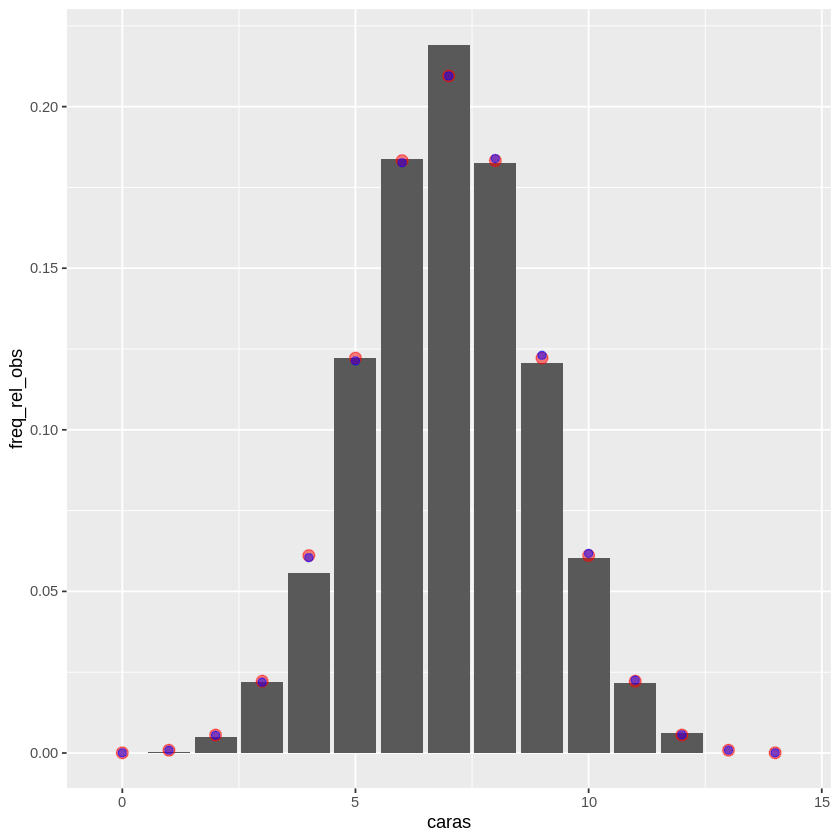

In [77]:
df_aux3 %>%
  ggplot() +
  aes(x = caras, y = freq_rel_obs) +
  geom_bar(stat = "identity") +
  geom_point(mapping = aes(y = dens_teorica), color = "red", size = 3,alpha = 0.5) +
  geom_point(mapping = aes(y = dens_obs), color = "blue", size = 2, alpha = 0.5)

In [66]:
mean(lanzamientos/14)
df_aux2 %>%
  summarise(p_est = sum(caras*n)/sum(n)/14)

[1] 0.5008857

p_est
<dbl>
0.5008857


# III) Distribución poisson
## Contexto
Usualmente una variable aleatoria poisson, representa la cantidad de eventos registrados en un interval fijo de tiempo con una cierta tasa de ocurrencia.
## Función de probabilidad

$$p(x) = \lambda^x \dfrac{e^{-\lambda}}{x!}, \ \ \ \ \ x \in \{0,1,2,3,...\} $$

Donde $\lambda$ corresponde a la tasa de ocurrencia y $x$ la cantida de eventos observados.

## Funciones en R
 * `dpois(x, lambda, log = FALSE)`
 * `ppois(q, lambda, lower.tail = TRUE, log.p = FALSE)`
 * `qpois(p, lambda, lower.tail = TRUE, log.p = FALSE)`
 * `rpois(n, lambda)`

**P5.** Suponga que en un restaurant de comida se tiene una tasa de llegada de clientes de 2 clientes por cada 3 minutos en promedio.
¿Cuál es la probabilidad de que 5 o más clientes lleguen en un período de 9 minutos?.


In [78]:
# La tasa de éxito en una dist. poisson es el parámetro lambda
# Dada la info, se tiene una tasa de 6 clientes cada 9 minutos
# lambda = 6
ppois(4,lambda = 6, lower.tail = F)#71% de prob de que lleguen 5 o más clientes en un lapso de 9 minutos.






[1] 0.7149435

**P6.** Se sabe que la tasa de falla en la elaboración de ampolletas sigue una distribución poisson, con una tasa de falla de 3 ampolletas defectuosas por semana.
¿Cuál es la probabilidad de que al cabo de un mes se genere un total de 20 ampolletas defectuosas o más?



In [79]:
# lambda = 3*4 = 12 ampolletas defectuosas por mes
ppois(19,lambda = 12, lower.tail = F)# Hay un 2% de prob de que se genern 20 o más ampolletass defectuosas en un mes.


[1] 0.02127977